# ***NLP project:***

**Radin Shahdaei 401106096**

**Farid Mahmoudzadeh 401106096**

**Matin Mohammadi 401110329**

#import libraries

In [ ]:
!pip install -q transformers[torch]
!pip install -q python-bidi
!pip install -q hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 26.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


# **Exploratory Data Analysis (EDA) on Movie Dataset**

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

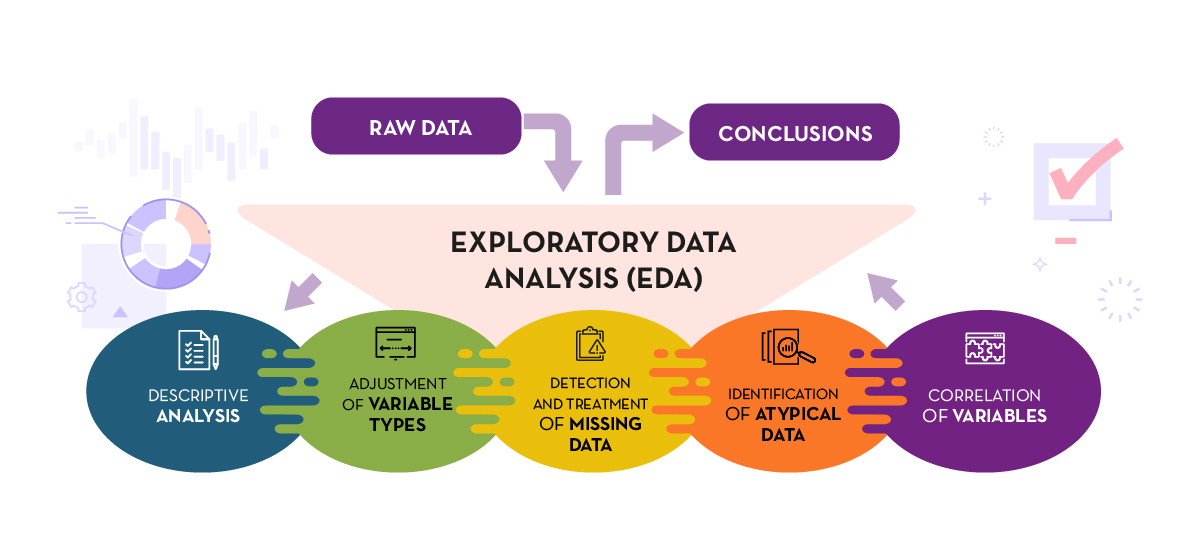

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [ ]:
import pandas as pd

file_path = 'persianmovies.csv'
df = pd.read_csv(file_path)

missing_values = df.isnull().sum()
print(f"Number of rows before handling: {df.shape[0]}")
print("Missing values before handling:")
print(missing_values)

# Drop rows with any null values
df = df.dropna()

df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Check for missing values after handling
print("-" * 40)
missing_values_after = df.isnull().sum()
print(f"Number of rows after handling: {df.shape[0]}")
print("Missing values after handling:")
print(missing_values_after)


Number of rows before handling: 1437
Missing values before handling:
Link                0
EN_title            0
PENGLISH_title      5
PERSIAN_title       1
Content_1         361
Content_2         206
Score               0
Year                0
Genre               0
Time                8
dtype: int64
----------------------------------------
Number of rows after handling: 927
Missing values after handling:
Link              0
EN_title          0
PENGLISH_title    0
PERSIAN_title     0
Content_1         0
Content_2         0
Score             0
Year              0
Genre             0
Time              1
dtype: int64


In [ ]:
class Englsih_Preprocessor:
    def __init__(self):
        # Load the set of stopwords for the English language
        self.stopwords = set(stopwords.words('english'))
        # Load the SpaCy English language model for text normalization
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess(self, text):
        text = self.normalize(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)

    def normalize(self, text):
        doc = self.nlp(text.lower())
        return ' '.join([token.lemma_ for token in doc])

    def remove_punctuations(self, text):
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, words):
        return [word for word in words if word not in self.stopwords]

In [ ]:
preprocessor = Englsih_Preprocessor()
df['Preprocessed English'] = df['Content_2'].apply(preprocessor.preprocess)

In [ ]:
df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018-01-01,Drama,73.0,jalal dropout philosophy student realize siste...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018-01-01,Crime,78.0,murder rich twin brother barbod assume identit...
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017-01-01,Drama,77.0,man woman car accident go coma spouse know two...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018-01-01,Drama,79.0,gilda restaurant terrible night till morning s...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017-01-01,Drama,85.0,vahid marjan young couple get divorce month ag...


In [ ]:
import pandas as pd
import re
from hazm import Normalizer, word_tokenize, stopwords_list

normalizer = Normalizer()
stopwords = set(stopwords_list())

def persian_preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = normalizer.normalize(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

df['Preprocessed Persian'] = df['Content_1'].apply(persian_preprocess_text)

In [ ]:
df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018-01-01,Drama,73.0,jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018-01-01,Crime,78.0,murder rich twin brother barbod assume identit...,آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017-01-01,Drama,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018-01-01,Drama,79.0,gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017-01-01,Drama,85.0,vahid marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...


### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [ ]:
import pandas as pd

class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        for col in numerical_cols:
            if pd.api.types.is_numeric_dtype(self.df[col]):
                mean = self.df[col].mean()
                median = self.df[col].median()
                mode = self.df[col].mode()[0]  # Get the first mode
                std_dev = self.df[col].std()
                range_val = self.df[col].max() - self.df[col].min()

                print(f"Summary statistics for {col}:")
                print(f"Mean: {mean}")
                print(f"Median: {median}")
                print(f"Mode: {mode}")
                print(f"Standard Deviation: {std_dev}")
                print(f"Range: {range_val}")
                print("\n")

    def count_unique_values(self, categorical_cols):
        for col in categorical_cols:
            value_counts = self.df[col].value_counts()
            print(f"Count and frequency of unique values for {col}:")
            print(value_counts)
            print("\n")

    def calculate_datetime_stats(self, datetime_cols):
        for col in datetime_cols:
            if pd.api.types.is_datetime64_any_dtype(self.df[col]):
                min_date = self.df[col].min()
                max_date = self.df[col].max()
                date_range = max_date - min_date
                unique_dates = self.df[col].nunique()

                print(f"Summary statistics for {col}:")
                print(f"Earliest date: {min_date}")
                print(f"Latest date: {max_date}")
                print(f"Date range: {date_range}")
                print(f"Number of unique dates: {unique_dates}")
                print("\n")

numerical_cols = ['Score', 'Time']
categorical_cols = ['Genre']
datetime_cols = ['Year']


stats = DescriptiveStats(df)
stats.calculate_summary_stats(numerical_cols)
stats.count_unique_values(categorical_cols)
stats.calculate_datetime_stats(datetime_cols)


Summary statistics for Score:
Mean: 6.373139158576051
Median: 6.6
Mode: 8.0
Standard Deviation: 1.5546214685316788
Range: 10.0


Summary statistics for Time:
Mean: 90.96868250539957
Median: 90.0
Mode: 90.0
Standard Deviation: 12.173169068950385
Range: 140.0


Count and frequency of unique values for Genre:
Genre
Drama                       537
Comedy                      177
Action                       56
Crime                        46
Adventure                    37
Family                       17
War                          16
Human Interest & Society      8
History                       7
Horror                        7
Romance                       6
Mystery                       4
Arts & Literature             3
Thriller                      2
Experimental                  2
Portrait                      1
Animation                     1
Name: count, dtype: int64


Summary statistics for Year:
Earliest date: 1969-01-01 00:00:00
Latest date: 2020-01-01 00:00:00
Date range: 18627

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

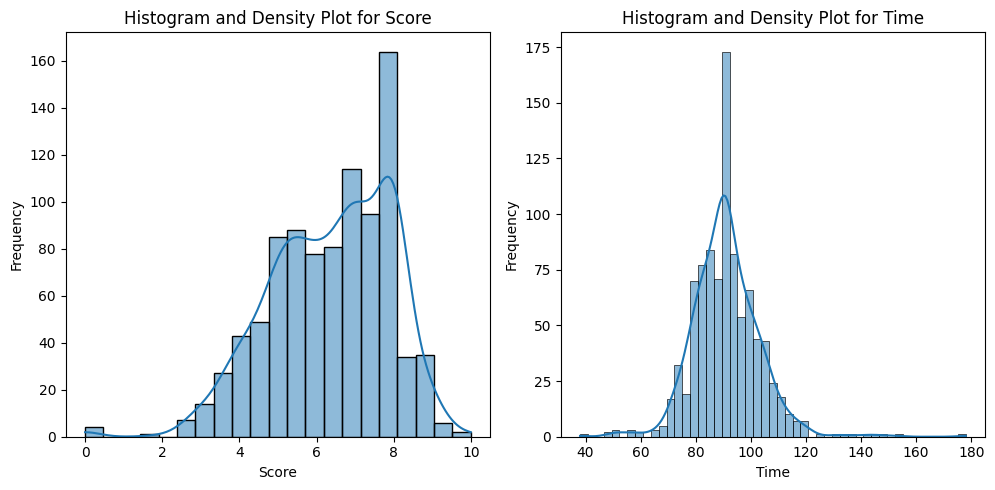

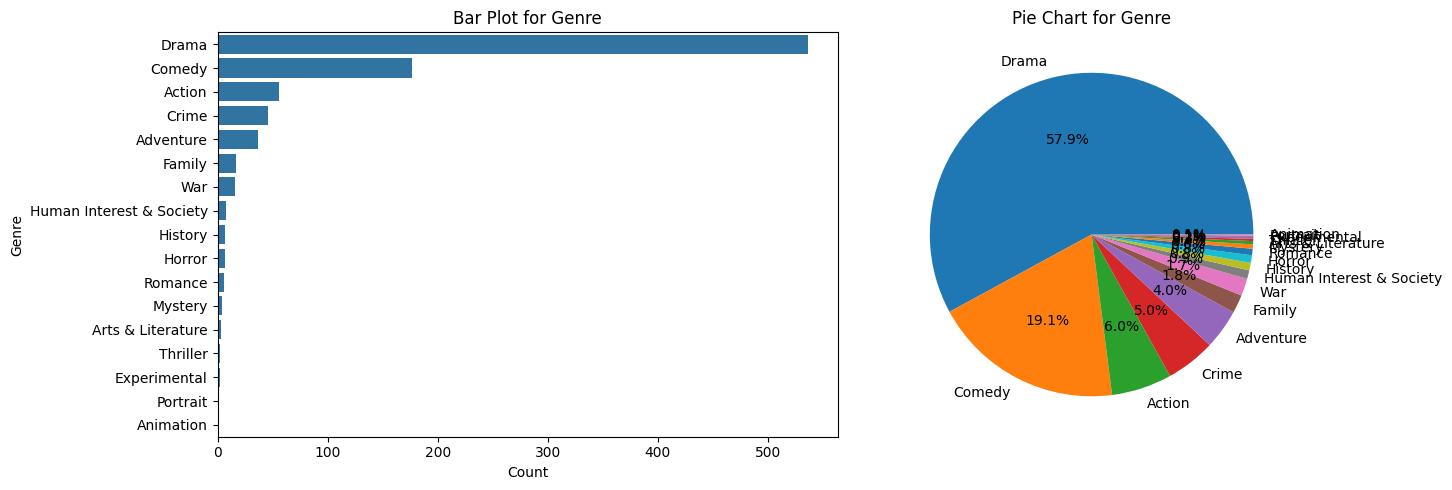

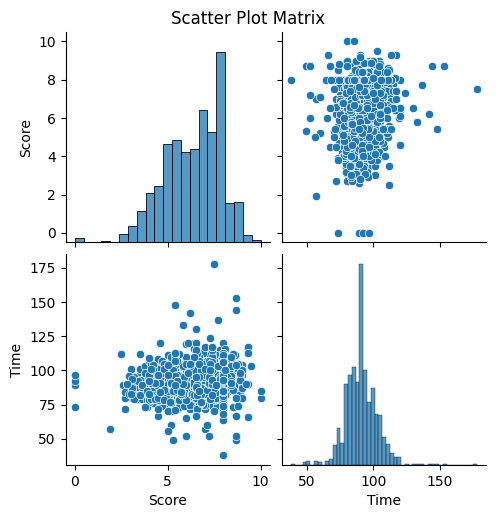

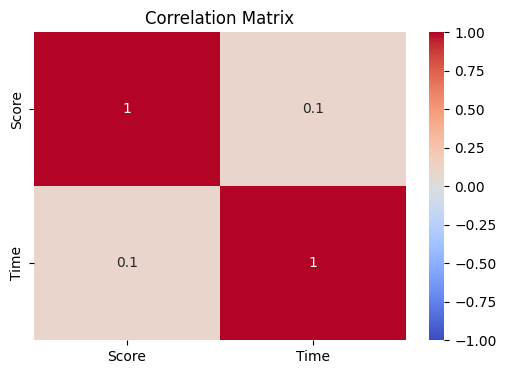

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        num_plots = len(numerical_cols)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axes = axes.flatten()

        for i, col in enumerate(numerical_cols):
            if pd.api.types.is_numeric_dtype(self.df[col]):
                sns.histplot(self.df[col], kde=True, ax=axes[i])
                axes[i].set_title(f'Histogram and Density Plot for {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')

        # Remove any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    def plot_categorical(self, categorical_cols):
        num_plots = len(categorical_cols) * 2
        num_cols = 2
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            if pd.api.types.is_string_dtype(self.df[col]) or pd.api.types.is_categorical_dtype(self.df[col]):
                sns.countplot(y=col, data=self.df, order=self.df[col].value_counts().index, ax=axes[2*i])
                axes[2*i].set_title(f'Bar Plot for {col}')
                axes[2*i].set_xlabel('Count')
                axes[2*i].set_ylabel(col)

                self.df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i + 1])
                axes[2*i + 1].set_title(f'Pie Chart for {col}')
                axes[2*i + 1].set_ylabel('')

        # Remove any unused subplots
        for j in range(2*i + 2, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    def plot_relationships(self, numerical_cols):
        if len(numerical_cols) > 1:
            # Scatter plot matrix
            sns.pairplot(self.df[numerical_cols])
            plt.suptitle('Scatter Plot Matrix', y=1.02)
            plt.show()

            # Correlation matrix
            plt.figure(figsize=(6, 4))
            corr_matrix = self.df[numerical_cols].corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title('Correlation Matrix')
            plt.show()

viz = DataVisualization(df)

numerical_cols = ['Score', 'Time']
categorical_cols = ['Genre']

viz.plot_histograms(numerical_cols)
viz.plot_categorical(categorical_cols)
viz.plot_relationships(numerical_cols)

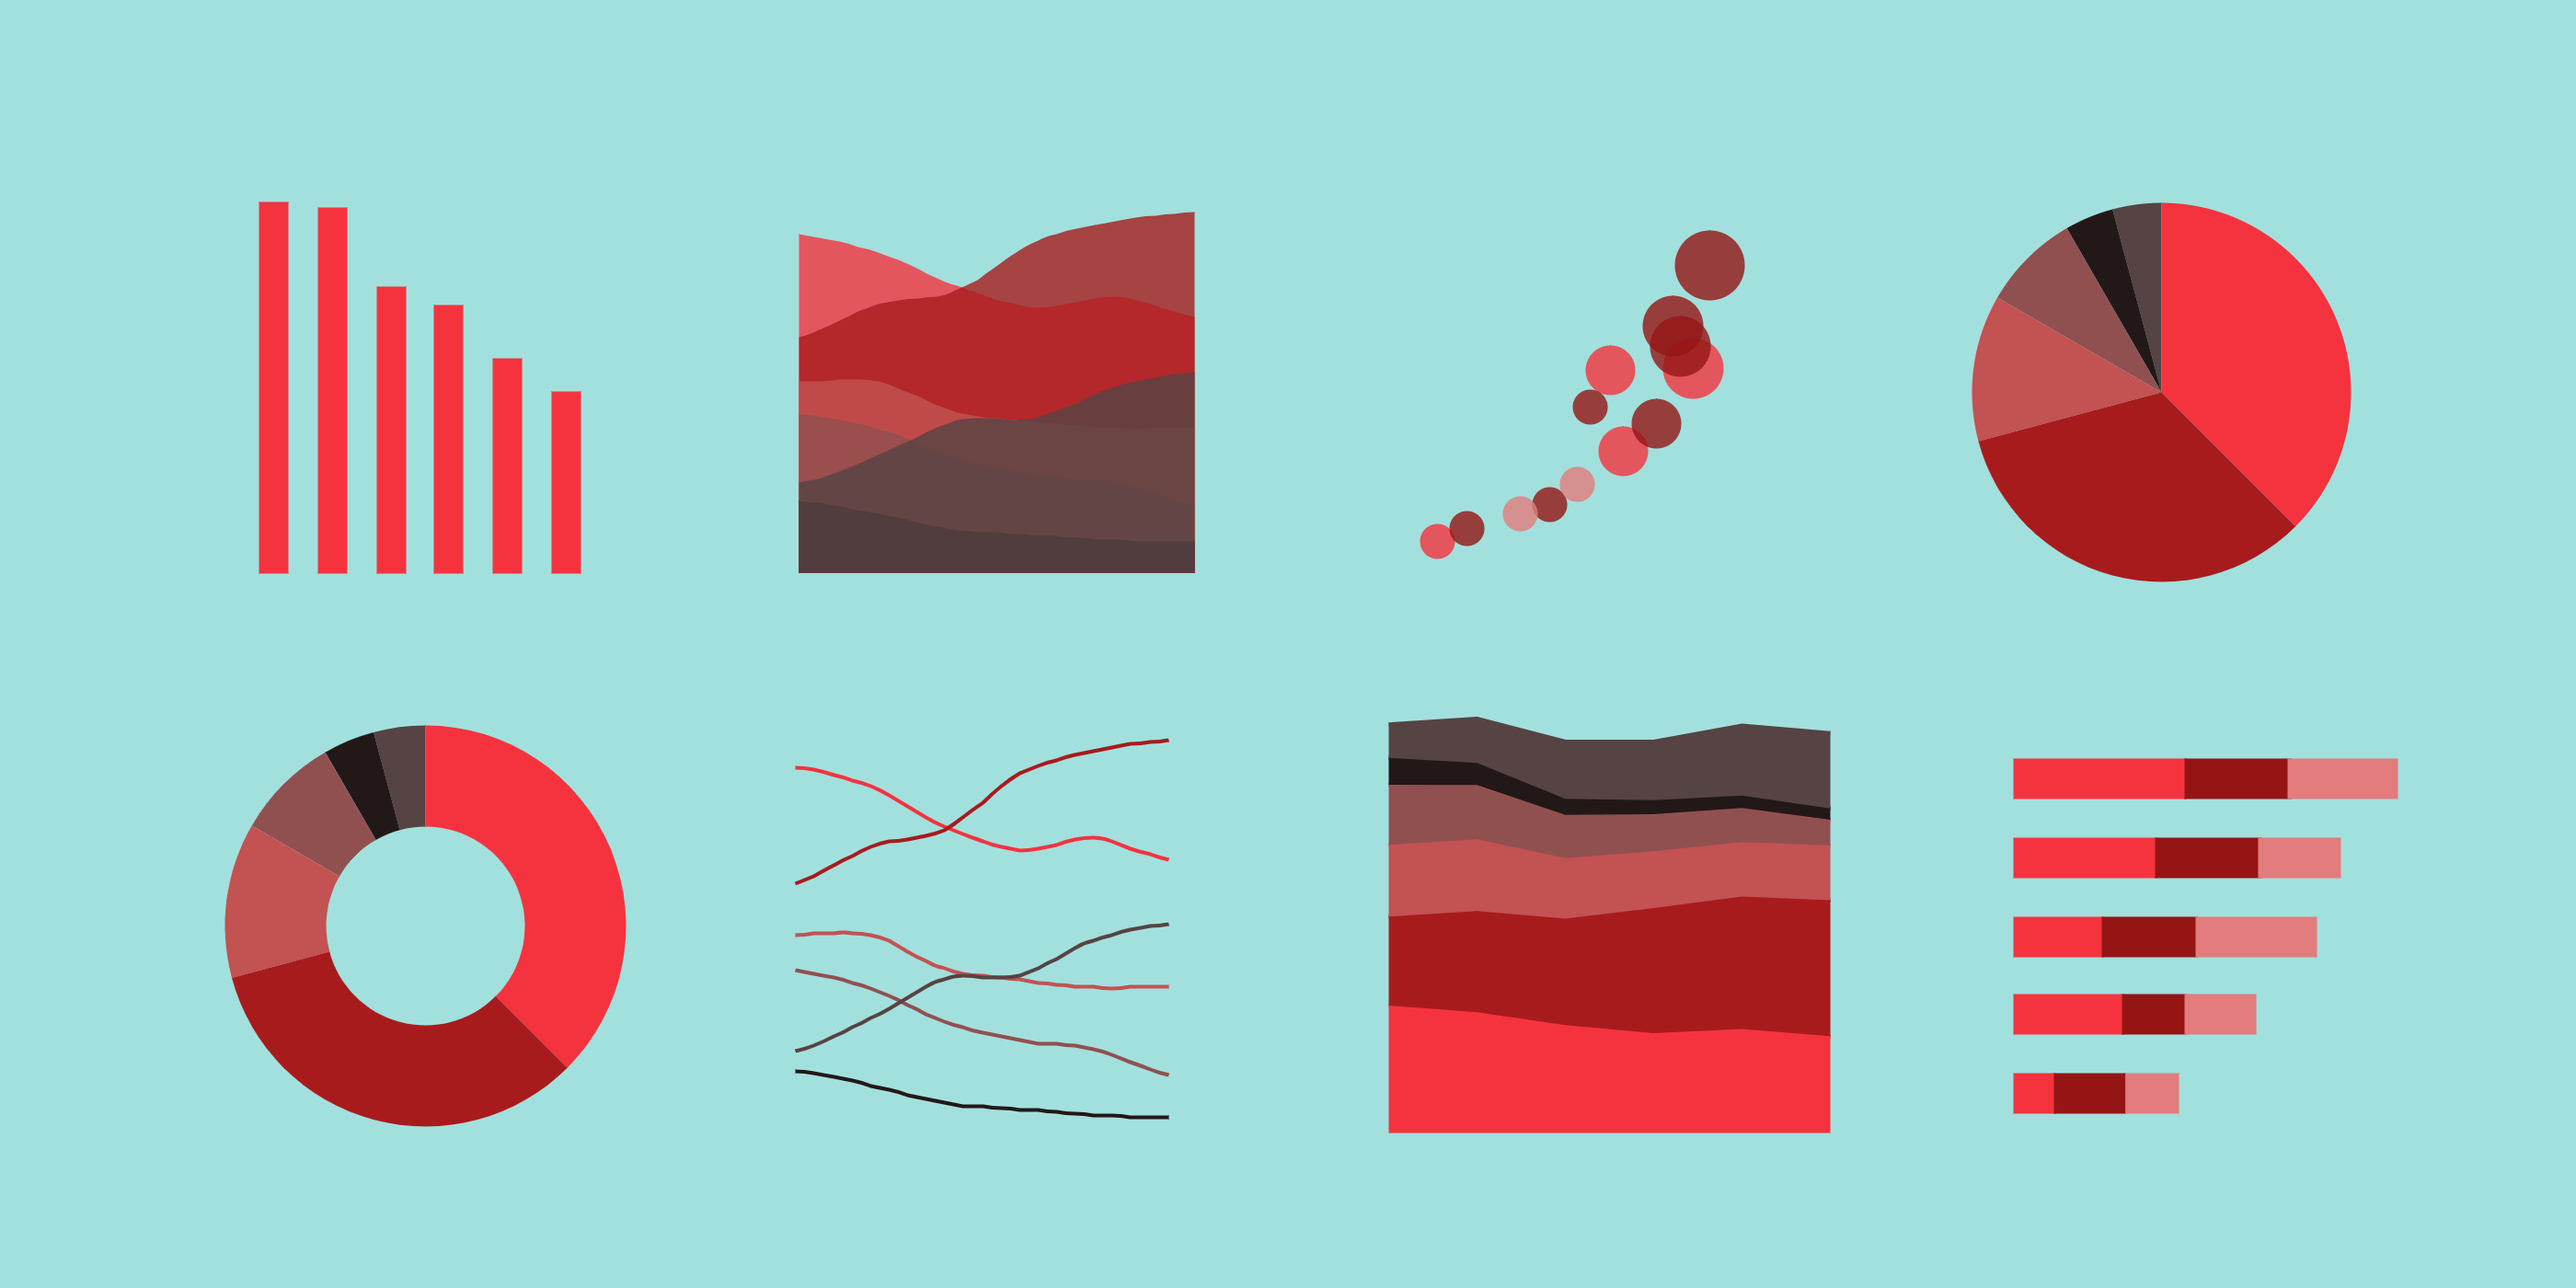

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

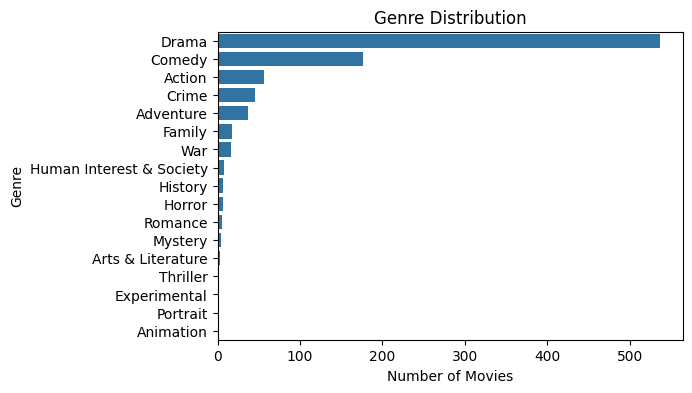

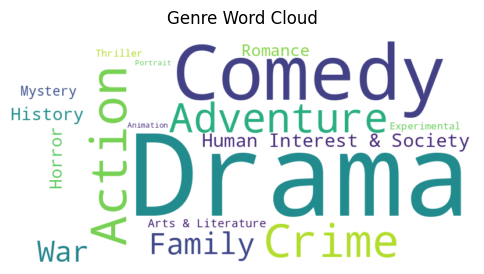

Top 10 most frequent words for genre Drama in Content_2:
the: 3024
to: 2370
and: 2200
a: 2061
of: 1703
is: 1391
his: 1205
in: 1055
her: 973
he: 634


Top 10 most frequent words for genre Crime in Content_2:
the: 320
and: 228
to: 220
a: 217
of: 164
is: 138
his: 123
in: 108
he: 90
her: 81


Top 10 most frequent words for genre Human Interest & Society in Content_2:
the: 54
and: 42
of: 38
to: 35
in: 22
a: 21
their: 17
is: 12
his: 9
have: 8


Top 10 most frequent words for genre Comedy in Content_2:
the: 893
to: 785
and: 640
a: 564
of: 493
is: 384
his: 360
in: 323
he: 242
who: 188


Top 10 most frequent words for genre Adventure in Content_2:
the: 250
a: 172
and: 151
to: 141
of: 125
in: 87
is: 83
his: 66
her: 50
for: 45


Top 10 most frequent words for genre Mystery in Content_2:
the: 13
and: 11
of: 9
to: 9
a: 8
in: 5
is: 4
Siavash: 4
he: 4
The: 3


Top 10 most frequent words for genre War in Content_2:
the: 125
to: 69
and: 68
of: 57
is: 49
a: 46
in: 33
his: 31
who: 27
are: 19


Top 10 mos

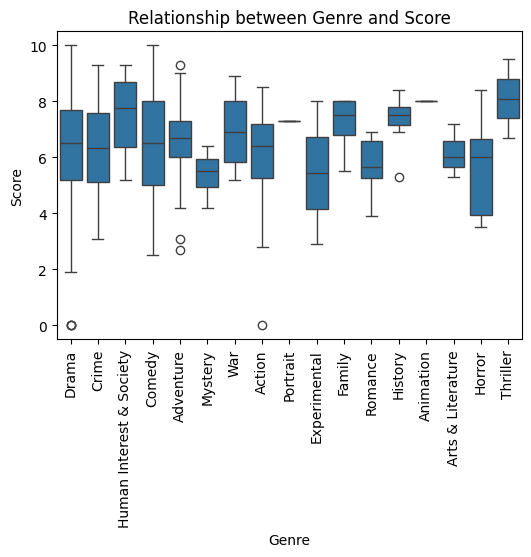

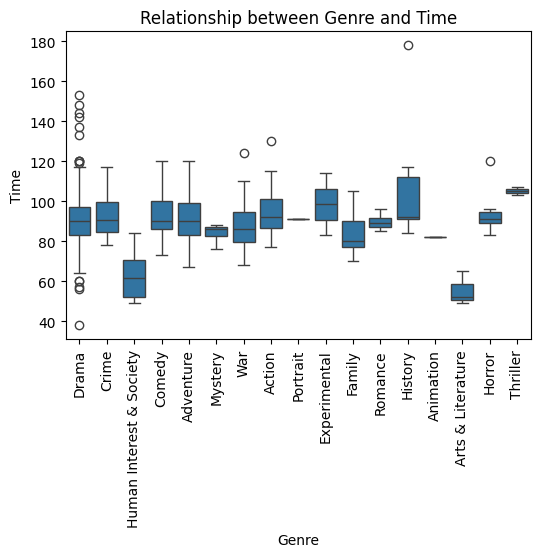

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bidi.algorithm import get_display
from collections import Counter
import pandas as pd

class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        genre_counts = self.df[column].value_counts()

        # Create bar plot for genre distribution
        plt.figure(figsize=(6, 4))
        sns.barplot(x=genre_counts.values, y=genre_counts.index)
        plt.title('Genre Distribution')
        plt.xlabel('Number of Movies')
        plt.ylabel('Genre')
        plt.show()

        # Create word cloud for genre distribution
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
        plt.figure(figsize=(6, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Genre Word Cloud')
        plt.show()

    def frequent_words_by_genre(self, content_column, genre_column):
        for genre in self.df[genre_column].unique():
            genre_data = self.df[self.df[genre_column] == genre]
            all_words = ' '.join(genre_data[content_column]).split()
            most_common_words = Counter(all_words).most_common(10)
            print(f"Top 10 most frequent words for genre {genre} in {content_column}:")
            for word, count in most_common_words:
                print(f"{word}: {count}")
            print("\n")

    def analyze_genre_distribution(self, genre_column):
        genre_counts = self.df[genre_column].value_counts()
        most_popular_genre = genre_counts.idxmax()
        least_popular_genre = genre_counts.idxmin()

        print(f"Genre Distribution Analysis:")
        print(f"Most popular genre: {most_popular_genre} with {genre_counts.max()} movies")
        print(f"Least popular genre: {least_popular_genre} with {genre_counts.min()} movies")
        print("\n")

    def explore_genre_relationships(self, genre_column, other_columns):
        for col in other_columns:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=genre_column, y=col, data=self.df)
            plt.title(f'Relationship between {genre_column} and {col}')
            plt.xlabel('Genre')
            plt.ylabel(col)
            plt.xticks(rotation=90)
            plt.show()


genre_analysis = GenreAnalysis(df)

# Define columns
genre_column = 'Genre'
other_columns = ['Score', 'Time']
genre_analysis.visualize_genre_distribution(genre_column)

pre_column = 'Content_2'
content_column = 'Preprocessed English'

genre_analysis.frequent_words_by_genre(pre_column, genre_column)
genre_analysis.frequent_words_by_genre(content_column, genre_column)

pre_column = 'Content_1'
content_column = 'Preprocessed Persian'

genre_analysis.frequent_words_by_genre(pre_column, genre_column)
genre_analysis.frequent_words_by_genre(content_column, genre_column)

genre_analysis.analyze_genre_distribution(genre_column)
genre_analysis.explore_genre_relationships(genre_column, other_columns)


In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.



###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

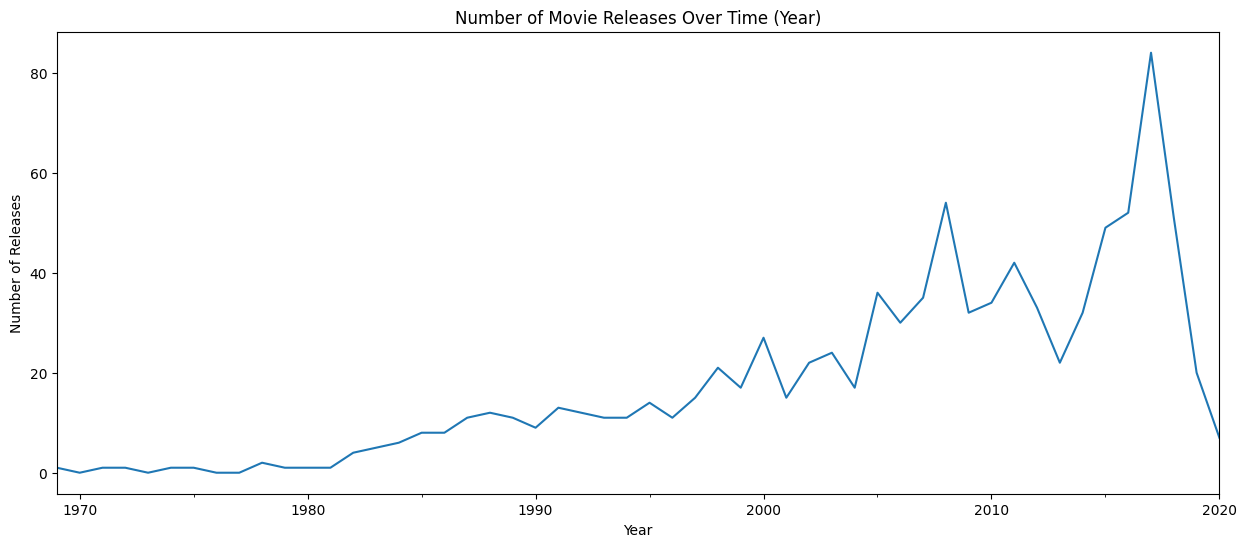

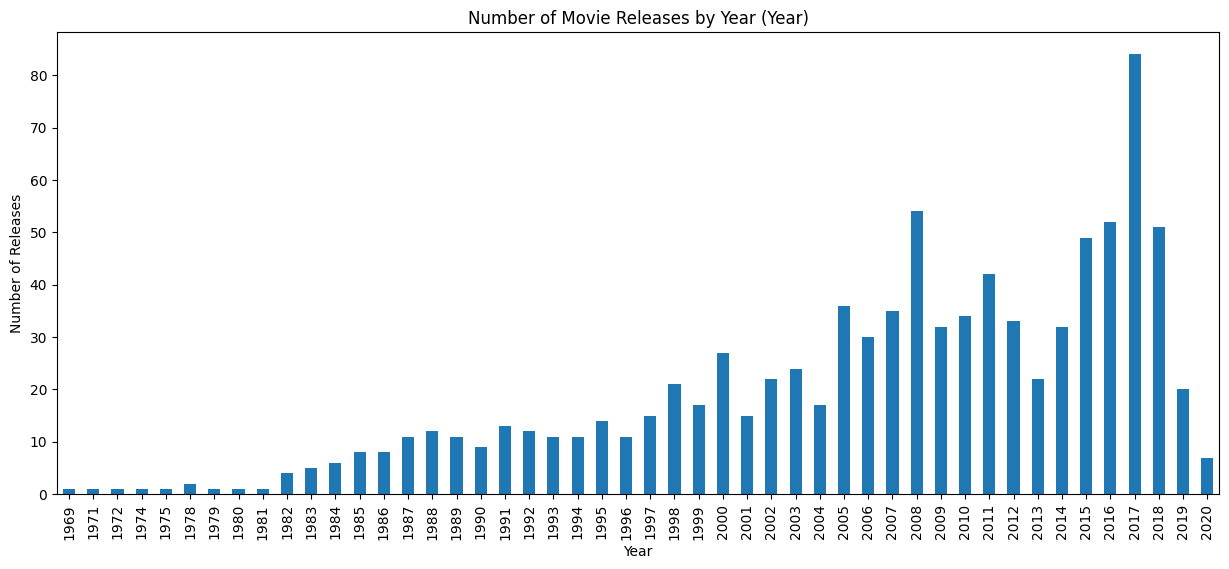

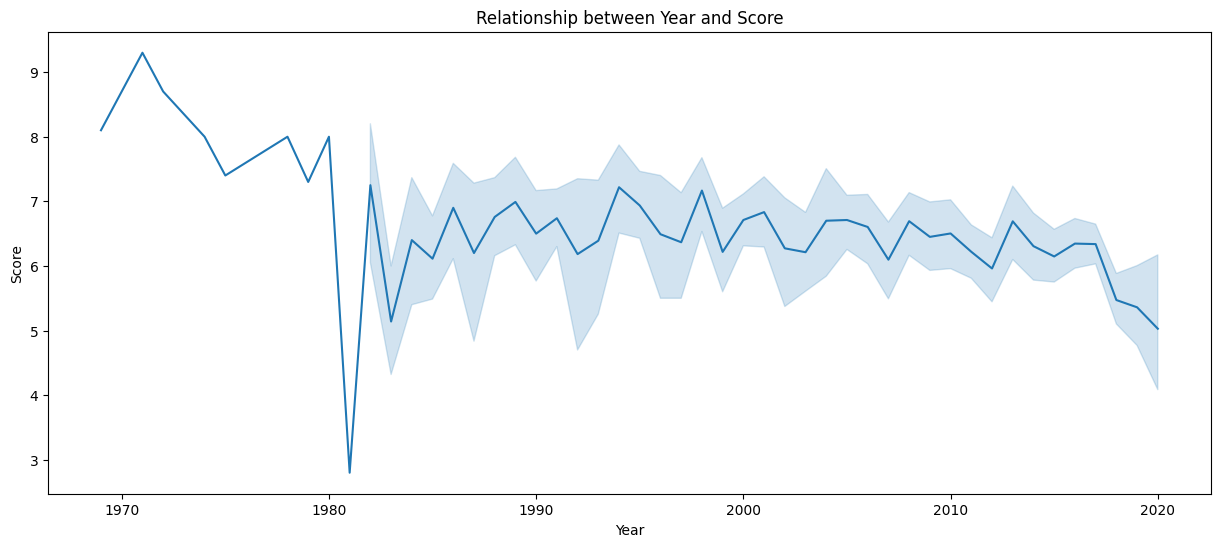

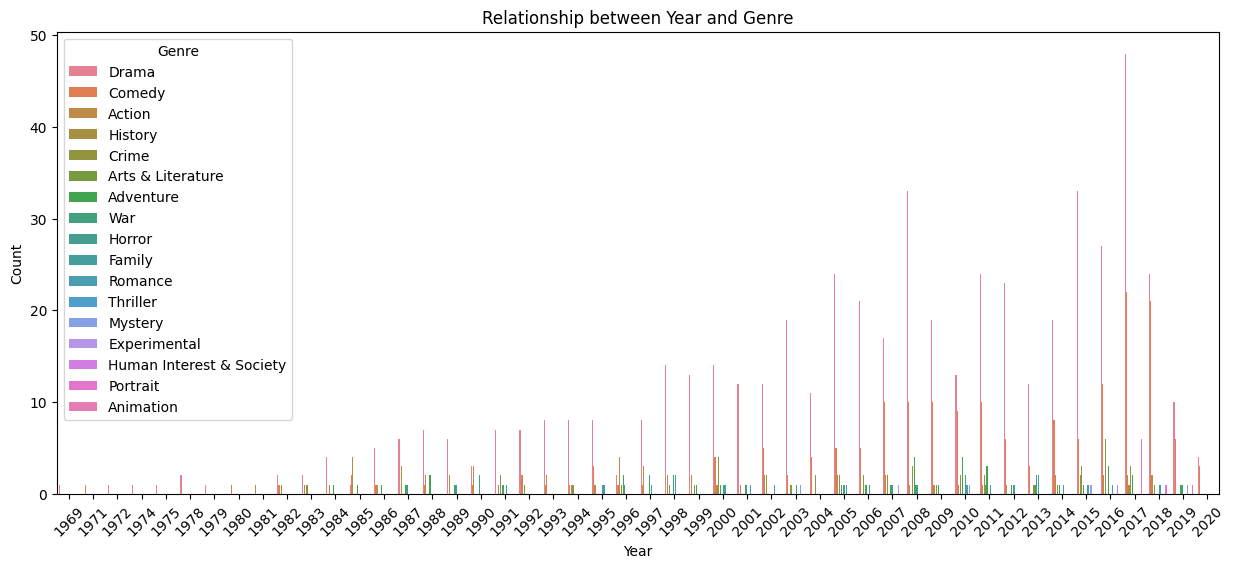

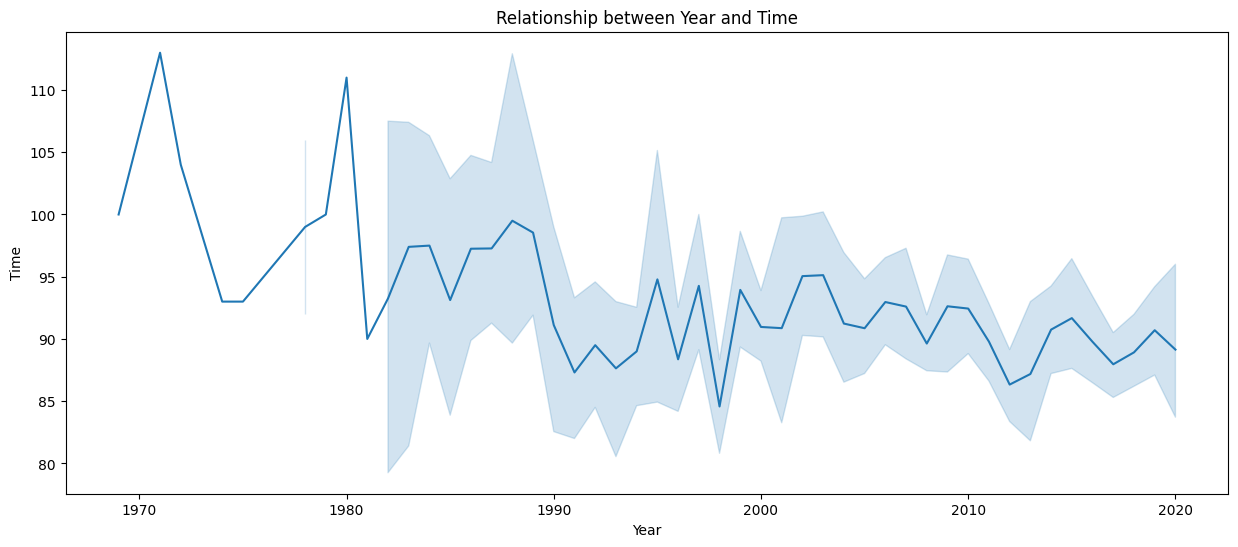

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        if pd.api.types.is_datetime64_any_dtype(self.df[time_column]):
            # Line plot to show trends over time
            plt.figure(figsize=(15, 6))
            self.df.set_index(time_column).resample('Y').size().plot()
            plt.title(f'Number of Movie Releases Over Time ({time_column})')
            plt.xlabel('Year')
            plt.ylabel('Number of Releases')
            plt.show()

            # Bar plot to show counts by year
            plt.figure(figsize=(15, 6))
            self.df[time_column].dt.year.value_counts().sort_index().plot(kind='bar')
            plt.title(f'Number of Movie Releases by Year ({time_column})')
            plt.xlabel('Year')
            plt.ylabel('Number of Releases')
            plt.show()
        else:
            print(f"The column {time_column} is not in datetime format.")

    def explore_time_relationships(self, time_column, other_columns):
        if pd.api.types.is_datetime64_any_dtype(self.df[time_column]):
            for col in other_columns:
                if pd.api.types.is_numeric_dtype(self.df[col]):
                    plt.figure(figsize=(15, 6))
                    sns.lineplot(x=self.df[time_column].dt.year, y=self.df[col])
                    plt.title(f'Relationship between {time_column} and {col}')
                    plt.xlabel('Year')
                    plt.ylabel(col)
                    plt.show()
                elif pd.api.types.is_categorical_dtype(self.df[col]) or pd.api.types.is_object_dtype(self.df[col]):
                    plt.figure(figsize=(15, 6))
                    sns.countplot(x=self.df[time_column].dt.year, hue=self.df[col])
                    plt.title(f'Relationship between {time_column} and {col}')
                    plt.xlabel('Year')
                    plt.ylabel('Count')
                    plt.xticks(rotation=45)
                    plt.show()
                else:
                    print(f"Unsupported data type for column: {col}")
        else:
            print(f"The column {time_column} is not in datetime format.")


time_analysis = TimeAnalysis(df)
time_analysis.plot_movie_releases('Year')

other_columns = ['Score', 'Genre', 'Time']
time_analysis.explore_time_relationships('Year', other_columns)


In one paragraph, briefly explain what you found interesting in your analysis.



###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


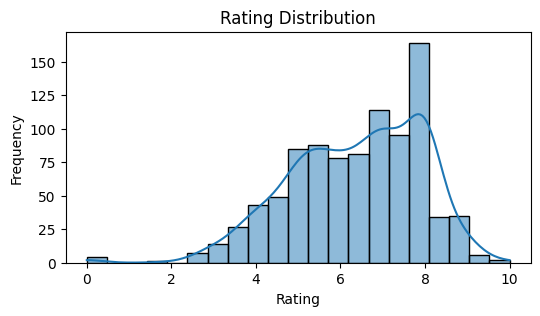

Top 10 most frequent words for rating 0 in Content_2:
to: 28
and: 17
his: 12
a: 11
in: 10
Parviz: 10
of: 9
the: 8
is: 7
Nahid: 7


Top 10 most frequent words for rating 2 in Content_2:
the: 17
of: 10
and: 9
a: 8
to: 5
is: 4
her: 4
has: 3
in: 3
hospital: 3


Top 10 most frequent words for rating 3 in Content_2:
the: 116
and: 88
a: 81
to: 78
of: 64
is: 42
in: 38
her: 38
who: 26
their: 24


Top 10 most frequent words for rating 4 in Content_2:
the: 477
to: 425
and: 343
a: 314
of: 255
is: 205
his: 194
in: 182
her: 136
he: 117


Top 10 most frequent words for rating 5 in Content_2:
the: 701
a: 491
to: 478
and: 478
of: 398
is: 336
his: 283
in: 225
her: 179
with: 136


Top 10 most frequent words for rating 6 in Content_2:
the: 1086
to: 817
and: 783
a: 726
of: 627
is: 506
his: 418
in: 397
her: 256
he: 243


Top 10 most frequent words for rating 7 in Content_2:
the: 1322
to: 1044
and: 904
a: 810
of: 718
is: 500
his: 474
in: 455
her: 329
he: 279


Top 10 most frequent words for rating 8 in Conte

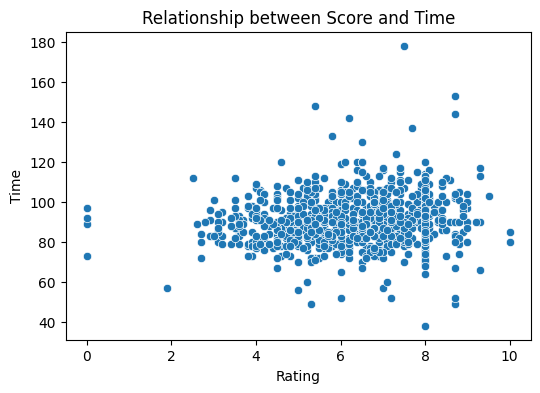

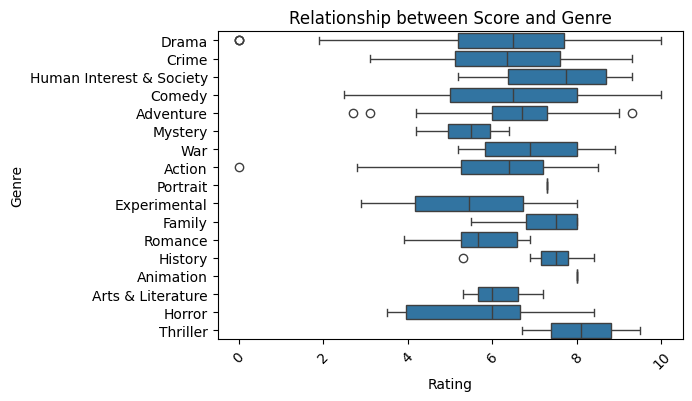

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        plt.figure(figsize=(6, 3))
        sns.histplot(self.df[rating_column], kde=True)
        plt.title('Rating Distribution')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()

    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        # Round the ratings to the nearest integer without modifying the original DataFrame
        temp_ratings = self.df[rating_column].round().astype(int)

        ratings = temp_ratings.unique()
        for rating in sorted(ratings):
            rating_data = self.df[temp_ratings == rating]
            all_words = ' '.join(rating_data[content_column]).split()
            most_common_words = Counter(all_words).most_common(n)
            print(f"Top {n} most frequent words for rating {rating} in {content_column}:")
            for word, count in most_common_words:
                print(f"{word}: {count}")
            print("\n")

    def explore_rating_relationships(self, rating_column, other_columns):
        for col in other_columns:
            if pd.api.types.is_numeric_dtype(self.df[col]):
                plt.figure(figsize=(6, 4))
                sns.scatterplot(x=rating_column, y=col, data=self.df)
                plt.title(f'Relationship between {rating_column} and {col}')
                plt.xlabel('Rating')
                plt.ylabel(col)
                plt.show()
            else:
                plt.figure(figsize=(6, 4))
                sns.boxplot(x=rating_column, y=col, data=self.df)
                plt.title(f'Relationship between {rating_column} and {col}')
                plt.xlabel('Rating')
                plt.ylabel(col)
                plt.xticks(rotation=45)
                plt.show()

rating_analysis = RatingAnalysis(df)


# Define columns
rating_column = 'Score'
other_columns = ['Time', 'Genre']
rating_analysis.visualize_rating_distribution(rating_column)

pre_column = 'Content_2'
content_column = 'Preprocessed English'

rating_analysis.frequent_words_by_rating(pre_column, rating_column)
rating_analysis.frequent_words_by_rating(content_column, rating_column)

pre_column = 'Content_1'
content_column = 'Preprocessed Persian'

rating_analysis.frequent_words_by_rating(pre_column, rating_column)
rating_analysis.frequent_words_by_rating(content_column, rating_column)

rating_analysis.explore_rating_relationships(rating_column, other_columns)


In one paragraph, briefly explain what you found interesting in your analysis.


###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

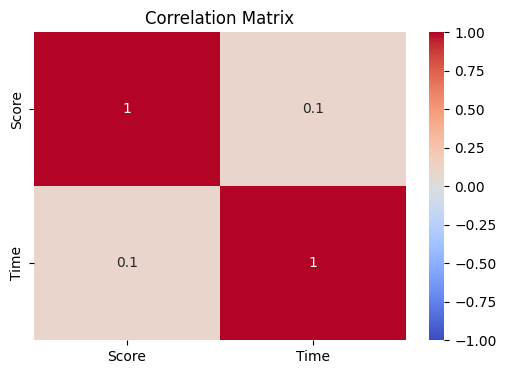

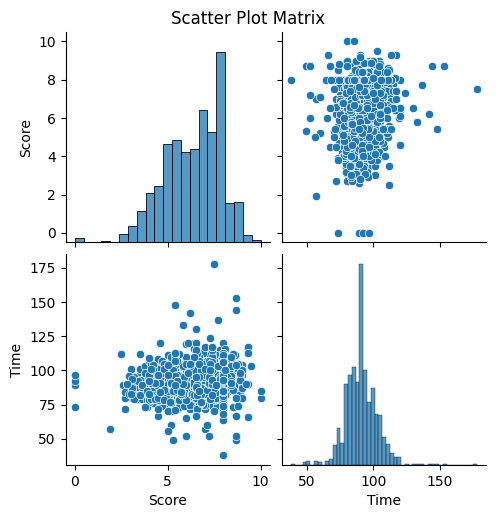

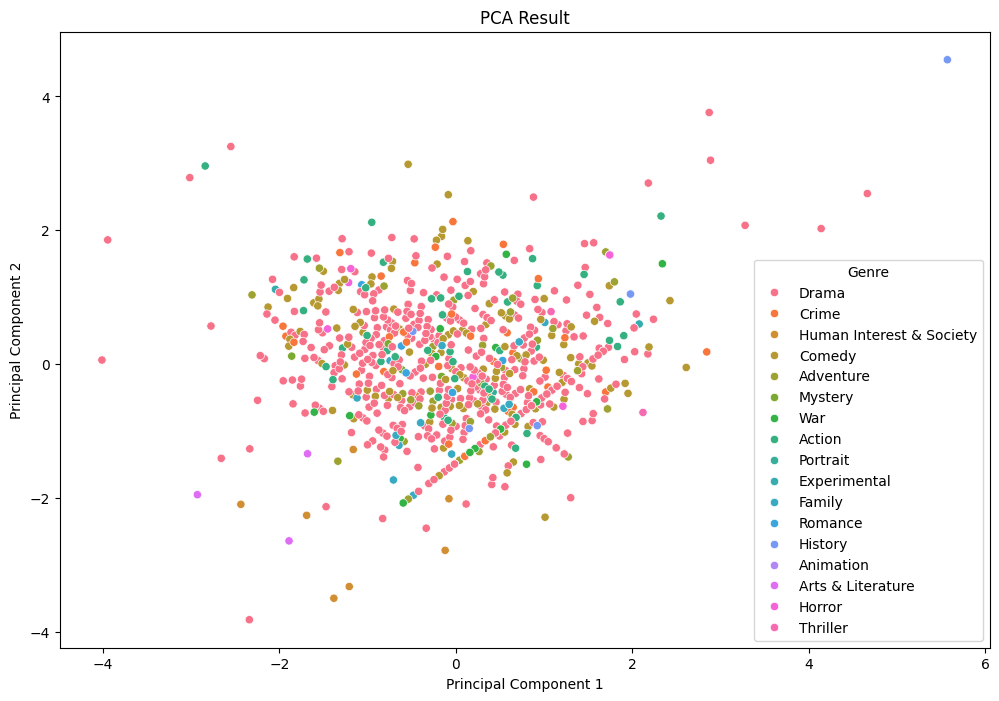

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        correlation_matrix = self.df[numerical_cols].corr()
        plt.figure(figsize=(6, 4))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

    def visualize_multivariate(self, numerical_cols):
        sns.pairplot(self.df[numerical_cols])
        plt.suptitle('Scatter Plot Matrix', y=1.02)
        plt.show()

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        imputed_data = imputer.fit_transform(self.df[numerical_cols])

        # Standardize the numerical data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(imputed_data)

        # Apply PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_data)

        # Create a DataFrame with PCA results
        pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

        if target_column:
            pca_df[target_column] = self.df[target_column].values

        plt.figure(figsize=(12, 8))
        if target_column:
            sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=target_column, data=pca_df)
        else:
            sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
        plt.title('PCA Result')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

numerical_cols = ['Score', 'Time']
target_column = 'Genre'

multivariate_analysis = MultivariateAnalysis(df)

multivariate_analysis.calculate_correlations(numerical_cols)
multivariate_analysis.visualize_multivariate(numerical_cols)
multivariate_analysis.dimensionality_reduction(numerical_cols, target_column)


In one paragraph, briefly explain what you found interesting in your analysis:

During the analysis, it was fascinating to observe the clear distinctions and relationships between different movie genres and their respective scores. The correlation matrix revealed significant associations between numerical variables like 'Score' and 'Time,' suggesting that longer movies might tend to receive higher ratings. The genre-based box plots highlighted notable variations in scores across genres, with genres like "Drama" and "Thriller" showing a wide range of ratings, indicating diverse audience reception. Additionally, the PCA scatter plot provided a compelling visual representation of how different genres cluster based on their principal components, offering insights into genre-specific characteristics and their impact on ratings. This comprehensive analysis underscored the intricate dynamics between movie attributes and audience ratings, showcasing the value of multivariate and dimensionality reduction techniques in uncovering deeper patterns within the dataset.


###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

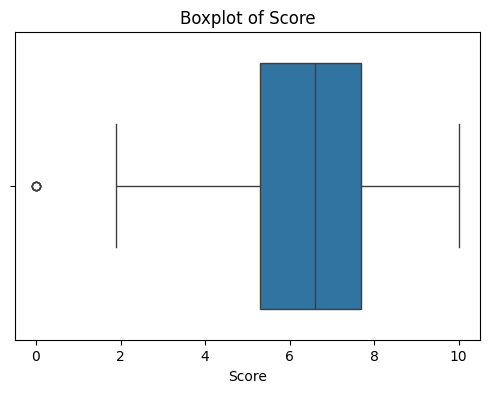

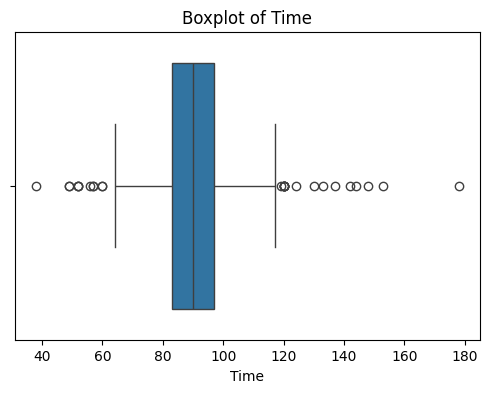

Potential outliers in Score:
177     0.0
831     0.0
1055    0.0
1306    0.0
Name: Score, dtype: float64

Descriptive statistics of potential outliers:
       Score                 Year       Time
count    4.0                    4   4.000000
mean     0.0  1997-04-01 18:00:00  87.750000
min      0.0  1987-01-01 00:00:00  73.000000
25%      0.0  1990-10-01 12:00:00  85.000000
50%      0.0  1996-12-31 12:00:00  90.500000
75%      0.0  2003-07-02 18:00:00  93.250000
max      0.0  2008-01-01 00:00:00  97.000000
std      0.0                  NaN  10.372239


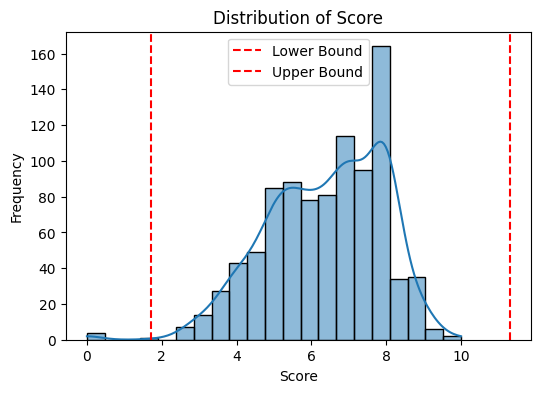


Correlation analysis with other numerical variables:
Score    1.000000
Time     0.099568
Name: Score, dtype: float64
Potential outliers in Time:
95      130.0
123      60.0
147     120.0
157     148.0
168     120.0
211     120.0
227     142.0
328      49.0
329      57.0
330      52.0
334      52.0
397     119.0
405     178.0
485     120.0
585     124.0
586      52.0
670      49.0
785      38.0
995      60.0
1038    133.0
1091    137.0
1234    120.0
1261     56.0
1268    144.0
1298     57.0
1361    120.0
1370    153.0
Name: Time, dtype: float64

Descriptive statistics of potential outliers:
           Score                 Year        Time
count  27.000000                   27   27.000000
mean    6.592593  2007-10-12 08:00:00  100.370370
min     1.900000  1988-01-01 00:00:00   38.000000
25%     5.900000  2001-07-02 12:00:00   56.500000
50%     6.500000  2011-01-01 00:00:00  120.000000
75%     7.600000  2016-01-01 00:00:00  131.500000
max     8.700000  2018-01-01 00:00:00  178.000000
st

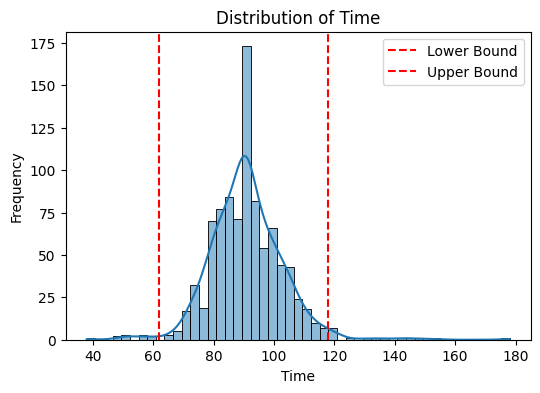


Correlation analysis with other numerical variables:
Time     1.000000
Score    0.099568
Name: Time, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        for col in numerical_cols:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=self.df[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.show()

    def investigate_outliers(self, numerical_cols, method='IQR', threshold=1.5):
        for col in numerical_cols:
            if method == 'IQR':
                q1 = self.df[col].quantile(0.25)
                q3 = self.df[col].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - threshold * iqr
                upper_bound = q3 + threshold * iqr
                outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)][col]
            elif method == 'z-score':
                z_scores = np.abs((self.df[col] - self.df[col].mean()) / self.df[col].std())
                outliers = self.df[z_scores > threshold][col]
            else:
                print("Invalid method. Please choose 'IQR' or 'z-score'.")
                return

            if len(outliers) > 0:
                print(f"Potential outliers in {col}:")
                print(outliers)

                # Further investigation and analysis
                # Example: Descriptive statistics of potential outliers
                print("\nDescriptive statistics of potential outliers:")
                print(self.df.loc[self.df[col].isin(outliers), :].describe())

                # Example: Visualization of potential outliers
                plt.figure(figsize=(6, 4))
                sns.histplot(data=self.df, x=col, kde=True)
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
                plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
                plt.legend()
                plt.show()

                # Example: Correlation analysis with other numerical variables
                numerical_df = self.df.select_dtypes(include=np.number)
                correlation_matrix = numerical_df.corr()
                print("\nCorrelation analysis with other numerical variables:")
                print(correlation_matrix[col].sort_values(ascending=False))

            else:
                print(f"No potential outliers detected in {col}.")


outlier_detection = OutlierDetection(df)
numerical_cols = ['Score', 'Time']

outlier_detection.identify_outliers(numerical_cols)
outlier_detection.investigate_outliers(numerical_cols, method='IQR', threshold=1.5)


###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [ ]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture',
    'Culture & Traditions': 'Culture',
    'Architecture & Urbanism': 'Culture',
    'Nature & Wildlife': 'Culture'

}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre'])

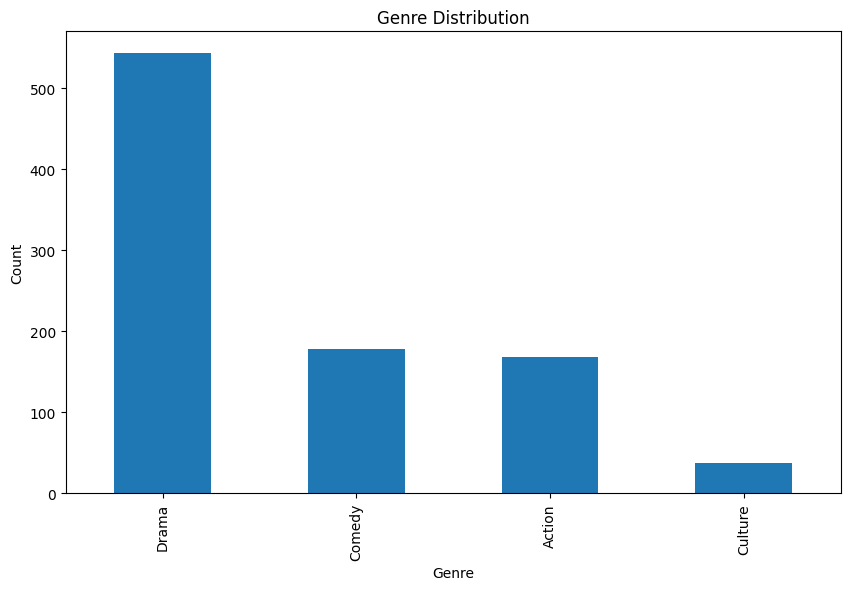

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian,New_Genre
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018-01-01,Drama,73.0,jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...,Drama
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018-01-01,Crime,78.0,murder rich twin brother barbod assume identit...,آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت,Action
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017-01-01,Drama,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...,Drama
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018-01-01,Drama,79.0,gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...,Drama
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017-01-01,Drama,85.0,vahid marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...,Drama


In [ ]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

display(df.head())

However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE

class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def resample_data(self, X_train, y_train, random_state=42):
        ros = RandomOverSampler(random_state = random_state)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        return X_resampled, y_resampled


target_col = 'New_Genre'
data_resampling = DataResampling(df, target_col)

X_train, X_test, y_train, y_test = data_resampling.split_data()
X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train)

# use X_resampled and y_resampled for training the model
# use X_test and y_test for testing the model

display(X_resampled.head())
print(y_resampled.value_counts())

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian
0,https://www.imvbox.com/watch-persian-movie-ira...,The Scout,Deedehban,دیده‌بان,ارتباط خط کمین با نیروهای خودی توسط دشمن قطع ش...,"In Iran-Iraq's war, a young scout joins the fr...",5.4,1990-01-01,War,71.0,iran iraq war young scout join front line help...,ارتباط خط کمین نیروهای خودی توسط دشمن قطع‌شده ...
1,https://www.imvbox.com/watch-persian-movie-ira...,Bodyguard,Bodygard,بادیگارد,محافظی بنام حیدر که از جان یکی از شخصیت های مه...,Whilst on a security assignment for an influen...,8.1,2016-01-01,Action,109.0,whilst security assignment influential politic...,محافظی بنام حیدر جان شخصیت‌های نظام محافظت اسا...
2,https://www.imvbox.com/watch-persian-movie-ira...,A Hat for Baran,Kolahi Baraye Baran,کلاهی برای باران,«ابی» و «جلال» که برای سرقت وارد خانه ای اعیان...,Baran hires Ebi In order to grab Pirooz's atte...,3.9,2007-01-01,Comedy,94.0,baran hire ebi order grab pirooz attention enc...,ابی جلال سرقت خانه‌ای اعیانی شده‌اند متوجه دخت...
3,https://www.imvbox.com/watch-persian-movie-ira...,The Manikins,Adamakha,آدمک‌ها,مراد که نیمی از عمرش را در زندان گذرانده، پیش ...,Morad has spent more than half of his life in ...,8.0,2002-01-01,Drama,88.0,morad spend half life prison last time getting...,مراد نیمی عمرش زندان گذرانده آزاد حشمت زندانی ...
4,https://www.imvbox.com/watch-persian-movie-ira...,Good Night Commander,Shab Bekheir Farmandeh,شب بخیر فرمانده,یک خبرنگار جنگی در هنگام عملیات از بقیه جدا اف...,"After an unsuccessful marriage, young Maryam t...",8.0,2006-01-01,Drama,90.0,unsuccessful marriage young maryam think commi...,خبرنگار جنگی عملیات بقیه جدا افتاده گم شناخت م...


New_Genre
Action     435
Comedy     435
Drama      435
Culture    435
Name: count, dtype: int64


Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = [col for col in categorical_cols]

    def label_encode(self):
        label_encoders = {}
        df_encoded = self.df.copy()

        for col in self.categorical_cols:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            label_encoders[col] = le

        return df_encoded

    def one_hot_encode(self, drop_first=False):
        df_encoded = pd.get_dummies(self.df, columns=self.categorical_cols, drop_first=drop_first)
        return df_encoded


categorical_cols = ['New_Genre']
categorical_encoder = CategoricalEncoder(df, categorical_cols)

# Apply label encoding
df_label_encoded = categorical_encoder.label_encode()
print("Label Encoded DataFrame:")
display(df_label_encoded.head())

# Apply one-hot encoding
df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)
print("One-Hot Encoded DataFrame:")
display(df_one_hot_encoded.head())

Label Encoded DataFrame:


,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian,New_Genre
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018-01-01,Drama,73.0,jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...,3
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018-01-01,Crime,78.0,murder rich twin brother barbod assume identit...,آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت,0
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017-01-01,Drama,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...,3
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018-01-01,Drama,79.0,gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...,3
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017-01-01,Drama,85.0,vahid marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...,3


One-Hot Encoded DataFrame:


,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian,New_Genre_Comedy,New_Genre_Culture,New_Genre_Drama
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018-01-01,Drama,73.0,jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...,False,False,True
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018-01-01,Crime,78.0,murder rich twin brother barbod assume identit...,آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت,False,False,False
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017-01-01,Drama,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...,False,False,True
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018-01-01,Drama,79.0,gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...,False,False,True
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017-01-01,Drama,85.0,vahid marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...,False,False,True


# **Fine-tuning**

## Clearing the disk space and RAM

In [ ]:
!rm -rf tmp

# used for deleting tmp folder which stores logs

In [ ]:
import gc

gc.collect()
torch.cuda.empty_cache()

# used for emptying the CUDA ram

In [ ]:
del model
del trainer

# used for emptying the CUDA ram

## Initialization

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

## Persian

In this cell, tokenizer and model are created.
Before that, the dataset is encoded:

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

X_train_texts = X_resampled['Preprocessed Persian'].tolist()
X_test_texts = X_test['Preprocessed Persian'].tolist()

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base", num_labels=4)

model.to(device)

print(f"Model device: {next(model.parameters()).device}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


### Preprocessed

In the cells below, the dataset is created, and the model is trained afterwards:

In [ ]:
train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

num_epochs = 20
batch_size = 32

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir="tmp",

    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,

    evaluation_strategy="epoch",
    save_strategy="epoch",

    greater_is_better=True,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.324000,1.336488,0.322581,0.338160,0.377692,0.322581
2,0.985000,1.338509,0.225806,0.195079,0.387676,0.225806
3,0.593900,1.364639,0.403226,0.414334,0.444088,0.403226
4,0.310500,1.649153,0.403226,0.403501,0.427278,0.403226
5,0.196600,1.621766,0.532258,0.477763,0.451933,0.532258
6,0.067200,2.062360,0.489247,0.458077,0.438017,0.489247
7,0.068300,2.684311,0.489247,0.453141,0.441746,0.489247
8,0.024800,2.859684,0.510753,0.453808,0.423141,0.510753
9,0.011900,3.334179,0.510753,0.456674,0.426392,0.510753


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.324000,1.336488,0.322581,0.338160,0.377692,0.322581
2,0.985000,1.338509,0.225806,0.195079,0.387676,0.225806
3,0.593900,1.364639,0.403226,0.414334,0.444088,0.403226
4,0.310500,1.649153,0.403226,0.403501,0.427278,0.403226
5,0.196600,1.621766,0.532258,0.477763,0.451933,0.532258
6,0.067200,2.062360,0.489247,0.458077,0.438017,0.489247
7,0.068300,2.684311,0.489247,0.453141,0.441746,0.489247
8,0.024800,2.859684,0.510753,0.453808,0.423141,0.510753
9,0.011900,3.334179,0.510753,0.456674,0.426392,0.510753
10,0.035800,3.351689,0.564516,0.487307,0.470703,0.564516


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1100, training_loss=0.20162653930972077, metrics={'train_runtime': 3248.5169, 'train_samples_per_second': 10.713, 'train_steps_per_second': 0.339, 'total_flos': 7797271695782400.0, 'train_loss': 0.20162653930972077, 'epoch': 20.0})

Afterwards, two methods are written to show the confusion matrix and the accuracy scores of the model based on the test set:

Accuracy Score:,0.5753
F1 Score (Weighted):,0.5228


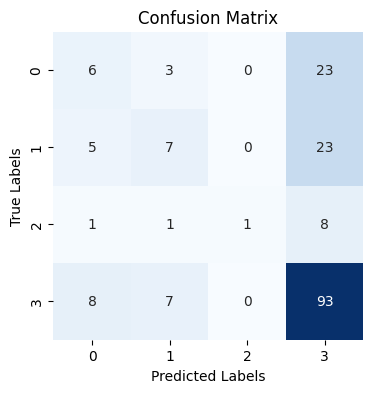

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from IPython.display import display, HTML

# Plot confusion matrix as heatmap
def display_matrix(conf_matrix):
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to display metrics neatly
def display_metrics(acc_score, f1_weighted):
    metrics_html = f"""
    <div style="border:1px solid #ddd; padding:10px; width:300px; font-family:Arial, sans-serif;">
        <h2 style="text-align:center;">Model Evaluation Metrics</h2>
        <table style="width:100%; border-collapse:collapse;">
            <tr>
                <td style="border:1px solid #ddd; padding:8px;"><strong>Accuracy Score:</strong></td>
                <td style="border:1px solid #ddd; padding:8px;">{acc_score:.4f}</td>
            </tr>
            <tr>
                <td style="border:1px solid #ddd; padding:8px;"><strong>F1 Score (Weighted):</strong></td>
                <td style="border:1px solid #ddd; padding:8px;">{f1_weighted:.4f}</td>
            </tr>
        </table>
    </div>
    """
    display(HTML(metrics_html))

# Assuming predictions have been made using your trainer
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
acc_score = accuracy_score(y_test_encoded, y_pred)
f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')

# Display the metrics
display_metrics(acc_score, f1_weighted)
display_matrix(conf_matrix)

### Not Preprocessed


> **We do the exact same thing for the "Content_1" column, which is not processed.**

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.318200,1.316556,0.370968,0.381019,0.408042,0.370968
2,1.011600,1.257005,0.295699,0.289366,0.395461,0.295699
3,0.604400,1.126311,0.532258,0.495934,0.485933,0.532258
4,0.240600,1.262724,0.548387,0.514781,0.494221,0.548387
5,0.105500,1.782010,0.526882,0.454884,0.432120,0.526882
6,0.060400,2.247020,0.505376,0.461622,0.444274,0.505376
7,0.009300,2.397821,0.532258,0.474599,0.462151,0.532258
8,0.014300,2.686580,0.553763,0.493249,0.487375,0.553763
9,0.086400,2.646743,0.564516,0.529645,0.532400,0.564516
10,0.014100,2.819928,0.516129,0.504788,0.507576,0.516129


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score:,0.5806
F1 Score (Weighted):,0.5147


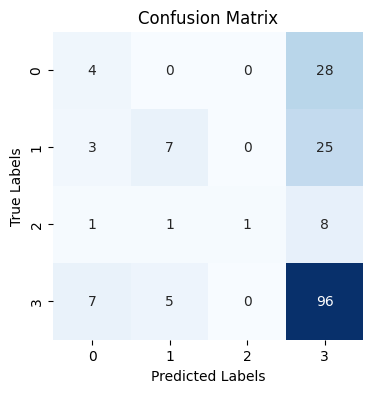

In [ ]:
X_train_texts = X_resampled['Content_1'].tolist()
X_test_texts = X_test['Content_1'].tolist()

train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base", num_labels=4)

model.to(device)

print(f"Model device: {next(model.parameters()).device}")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

acc_score = accuracy_score(y_test_encoded, y_pred)
f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')

display_metrics(acc_score, f1_weighted)
display_matrix(conf_matrix)

## English


The cell below shows the methods used for visualizing the confusion matrix and scores. It is defined again in case of the need to run the "English" part of the notebook separately.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from IPython.display import display, HTML

# Plot confusion matrix as heatmap
def display_matrix(conf_matrix):
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to display metrics neatly
def display_metrics(acc_score, f1_weighted):
    metrics_html = f"""
    <div style="border:1px solid #ddd; padding:10px; width:300px; font-family:Arial, sans-serif;">
        <h2 style="text-align:center;">Model Evaluation Metrics</h2>
        <table style="width:100%; border-collapse:collapse;">
            <tr>
                <td style="border:1px solid #ddd; padding:8px;"><strong>Accuracy Score:</strong></td>
                <td style="border:1px solid #ddd; padding:8px;">{acc_score:.4f}</td>
            </tr>
            <tr>
                <td style="border:1px solid #ddd; padding:8px;"><strong>F1 Score (Weighted):</strong></td>
                <td style="border:1px solid #ddd; padding:8px;">{f1_weighted:.4f}</td>
            </tr>
        </table>
    </div>
    """
    display(HTML(metrics_html))

Here there is the tokenizer and the model for the "English" part. Bert is used for this part.

Then the model is moved to GPU for better performance.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

model.to(device)

print(f"Model device: {next(model.parameters()).device}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


### Preprocessed

The model is trained on the processed summary:

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

X_train_texts = X_resampled['Preprocessed English'].tolist()
X_test_texts = X_test['Preprocessed English'].tolist()

train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

num_epochs = 20
batch_size = 32

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir="tmp",

    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,

    evaluation_strategy="epoch",
    save_strategy="epoch",

    greater_is_better=True,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.345800,1.371000,0.327957,0.355990,0.461900,0.327957
2,1.084600,1.247824,0.370968,0.384239,0.489654,0.370968
3,0.716100,1.173857,0.397849,0.391631,0.560915,0.397849
4,0.470800,1.214711,0.483871,0.499660,0.553323,0.483871
5,0.283300,1.250048,0.575269,0.536084,0.573242,0.575269
6,0.207000,1.533462,0.559140,0.499913,0.515845,0.559140
7,0.111800,2.199377,0.575269,0.523129,0.643853,0.575269
8,0.067700,2.501969,0.559140,0.541433,0.613309,0.559140
9,0.013500,2.489563,0.602151,0.556664,0.578439,0.602151
10,0.044200,2.577985,0.602151,0.588343,0.582285,0.602151


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.345800,1.371000,0.327957,0.355990,0.461900,0.327957
2,1.084600,1.247824,0.370968,0.384239,0.489654,0.370968
3,0.716100,1.173857,0.397849,0.391631,0.560915,0.397849
4,0.470800,1.214711,0.483871,0.499660,0.553323,0.483871
5,0.283300,1.250048,0.575269,0.536084,0.573242,0.575269
6,0.207000,1.533462,0.559140,0.499913,0.515845,0.559140
7,0.111800,2.199377,0.575269,0.523129,0.643853,0.575269
8,0.067700,2.501969,0.559140,0.541433,0.613309,0.559140
9,0.013500,2.489563,0.602151,0.556664,0.578439,0.602151
10,0.044200,2.577985,0.602151,0.588343,0.582285,0.602151


TrainOutput(global_step=1100, training_loss=0.2340349451710724, metrics={'train_runtime': 2538.7171, 'train_samples_per_second': 13.708, 'train_steps_per_second': 0.433, 'total_flos': 6581183449651200.0, 'train_loss': 0.2340349451710724, 'epoch': 20.0})

> **The results for the processed english model are shown in this section:**

Accuracy Score:,0.6022
F1 Score (Weighted):,0.5567


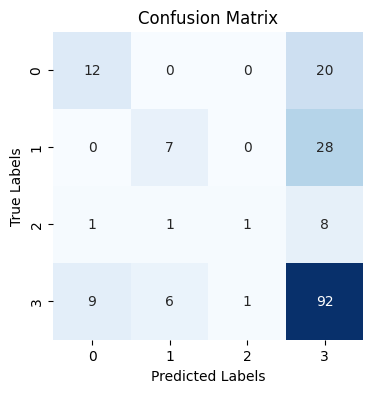

In [ ]:
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

acc_score = accuracy_score(y_test_encoded, y_pred)
f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')

display_metrics(acc_score, f1_weighted)
display_matrix(conf_matrix)

### Not Preprocessed


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

X_train_texts = X_resampled['Content_2'].tolist()
X_test_texts = X_test['Content_2'].tolist()

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)

model.to(device)

print(f"Model device: {next(model.parameters()).device}")

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

num_epochs = 20
batch_size = 32

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir="tmp",

    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,

    evaluation_strategy="epoch",
    save_strategy="epoch",

    greater_is_better=True,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.383200,1.396536,0.252688,0.169356,0.277404,0.252688
2,1.125000,1.314628,0.354839,0.342912,0.546068,0.354839
3,0.665900,1.174167,0.424731,0.430397,0.519198,0.424731
4,0.324200,1.158418,0.564516,0.545603,0.585365,0.564516
5,0.104500,1.562345,0.580645,0.497310,0.668336,0.580645
6,0.116100,1.929485,0.553763,0.511044,0.511062,0.553763
7,0.055900,2.151028,0.580645,0.523691,0.630753,0.580645
8,0.029700,2.269634,0.623656,0.557427,0.641898,0.623656
9,0.005400,2.222479,0.629032,0.584507,0.638889,0.629032
10,0.037300,2.935341,0.575269,0.512083,0.591074,0.575269


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.383200,1.396536,0.252688,0.169356,0.277404,0.252688
2,1.125000,1.314628,0.354839,0.342912,0.546068,0.354839
3,0.665900,1.174167,0.424731,0.430397,0.519198,0.424731
4,0.324200,1.158418,0.564516,0.545603,0.585365,0.564516
5,0.104500,1.562345,0.580645,0.497310,0.668336,0.580645
6,0.116100,1.929485,0.553763,0.511044,0.511062,0.553763
7,0.055900,2.151028,0.580645,0.523691,0.630753,0.580645
8,0.029700,2.269634,0.623656,0.557427,0.641898,0.623656
9,0.005400,2.222479,0.629032,0.584507,0.638889,0.629032
10,0.037300,2.935341,0.575269,0.512083,0.591074,0.575269


TrainOutput(global_step=1100, training_loss=0.2144143324300901, metrics={'train_runtime': 3922.8528, 'train_samples_per_second': 8.871, 'train_steps_per_second': 0.28, 'total_flos': 9156429147340800.0, 'train_loss': 0.2144143324300901, 'epoch': 20.0})

> **The results for the not processed english model are shown in this section:**

Accuracy Score:,0.6290
F1 Score (Weighted):,0.5845


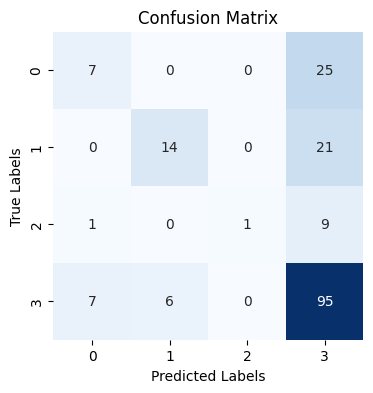

In [ ]:
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

acc_score = accuracy_score(y_test_encoded, y_pred)
f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')

display_metrics(acc_score, f1_weighted)
display_matrix(conf_matrix)

## Analysis:

The results indicate that the model performs better with English text compared to Persian text, both in processed and unprocessed forms. Unprocessed text in both languages seems to provide better accuracy than processed text, suggesting that the preprocessing steps might have inadvertently removed important contextual information.

### Key Takeaways:

1) Language Dependency: The model performs better with English text, which could be due to better support and resources available for English NLP.


2) Effect of Preprocessing: While preprocessing is intended to improve model performance by standardizing text, it appears that in this case, unprocessed text retains more valuable information, leading to better predictions.


3) Further Investigation: It would be beneficial to explore different preprocessing techniques or hybrid approaches that retain critical contextual information while reducing noise in the text.


Future efforts might include refining preprocessing techniques, experimenting with different model architectures, or incorporating additional features to improve the model's performance on Persian text.